# Lab Assignment Six: CNN's

### Luis Garduno
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Brief Business Understanding
#### <u><code>About STL-10</code></u>

Inspired by the __[CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html)__
dataset, STL-10 is a dataset containing a combination of images (gathered from
__[ImageNet](http://www.image-net.org/)__
of animals and transportation objects. Within the dataset there are 6 animal & 4 transportation object classes:
- __Animals__ : bird, cat, deer, dog, horse, monkey
- __Transportation Objects__ : airplane, car, ship, truck

The dataset contains 3 folders that will be used at specified times:
- __Train__ : 5000 images used to train the algorithm
- __Test__ : 8000 images used to test an algorithm (800 images per class)
- __Unlabeled__ : 100,000 unlabeled image files

Aside from not having identical classes, another difference between the datasets, is that the
images in STL-10 are 3x's the resolution of CIFAR-10's images (96x96 versus 32x32).

STL-10 is specifically an image recognition dataset. The dataset is intended to be used for developing
unsupervised feature learning, deep learning, self-taught algorithms. That being said, the primary prediction
task is to determine the type of animal or transportation object found in each of the pictures in the Unlabeled folder.
Something that should be noted about the "Unlabeled" folder, aside from it containing the classes mentioned above,
it additionally includes other types of animals (bears, rabbits, etc.) and transportation objects[trains, buses, etc.).

#### <u><code>Measuring Success</code></u>

One reason this data is important is if trained correctly & the prediction task is achieved, third parties that
use image captcha's for their websites, networks, etc. could use this data as a way to visualize how captcha's can
be bypassed by __unsupervised__ feature learning, which essentially defeats the purpose of having a captcha test.

In order for this data to be of use to third parties using captcha's, I believe the prediction algorithm will
have to render at least an 80% accuracy. The reason it isn't 90% is because if the prediction algorithm selects a
wrong image, or doesn't recognize an image, often times captcha test's will let you get away with about 2 or less errors.

- Choose & explain what metric(s) I will use to evaluate my algorithm’s performance.
- I should give a detailed argument for why this (these) metric(s) are appropriate on your data.
- That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task).
- (accuracy is RARELY the best evaluation metric to use. Think deeply about an appropriate measure of performance.)


-------------------------------------
Dataset : <a href="https://www.kaggle.com/jessicali9530/stl10" target="_top"><b>STL-10 Kaggle Dataset</b></a>

Question Of Interest : Identify the type of animal or transportation object shown in the picture

----------------------------------------------

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1 Data Preparation

In [1]:
import glob
import pandas as pd
import numpy as np
from tkinter import Tcl
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

with open('./data/stl10_binary/train_y.bin', 'rb') as f:
    labels = np.fromfile(f, dtype=np.uint8)

with open('./data/stl10_binary/class_names.txt', 'r') as f:
    classNames = [line.rstrip() for line in f]

# Reading in the dataset (sorted by filename) into a numpy array
file_X = list(Tcl().call('lsort', '-dict', glob.glob('..\..\STL10\Train\*.png')))
rgb_matrix = np.array([np.array(Image.open(file)) for file in file_X])
_, h, w, c = rgb_matrix.shape

# Create new numpy array w/ re-colored greyscaled images
greyscale_matrix = np.array([np.array(Image.open(file).convert("L")) for file in file_X])

df = pd.DataFrame({'' : ['# of Samples','# of Features','Image Resolution','# of Channels','Image Size']})
df['Original Data']  = [_, h*w*c, '{} x {}'.format(h,w), c, str(h*w*c) + 'px\'s']
df['Greyscale Data']  = [_, h*w, '{} x {}'.format(h,w), 1, str(h*w) + 'px\'s']

rgb_vec = rgb_matrix.reshape((_,h*w*c))
greyscale_vec = greyscale_matrix.reshape((_,h*w))

print("\nOriginal Matrix Shape   :  Before", rgb_matrix.shape, "----->  After", rgb_vec.shape,"\n")
print("Greyscale Matrix Shape  :  Before", greyscale_matrix.shape, "   ----->  After",greyscale_vec.shape, "\n\n")

df


Original Matrix Shape   :  Before (5000, 96, 96, 3) ----->  After (5000, 27648) 

Greyscale Matrix Shape  :  Before (5000, 96, 96)    ----->  After (5000, 9216) 




,,Original Data,Greyscale Data
0,# of Samples,5000,5000
1,# of Features,27648,9216
2,Image Resolution,96 x 96,96 x 96
3,# of Channels,3,1
4,Image Size,27648px's,9216px's


We begin by reading the dataset into a numpy array, but because it contains colored images, it would be optimal
to turn it into a grayscale array so we are able to compute faster.

Then after doing so, the shape of the original matrix and grayscale are outputted to show the initial dimensions.
To the right of these shapes, are the concatenated versions of those matrices.

At the bottom a table is created to better understand the differences between the 2 matrices, one containing color
pictures and the other one containing greyscaled images. Here, is where we notice the large distance between the image
sizes for each matrix. Notice how each greyscaled picture is 3 times smaller than the original color pictures.

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2 Visualizing Images

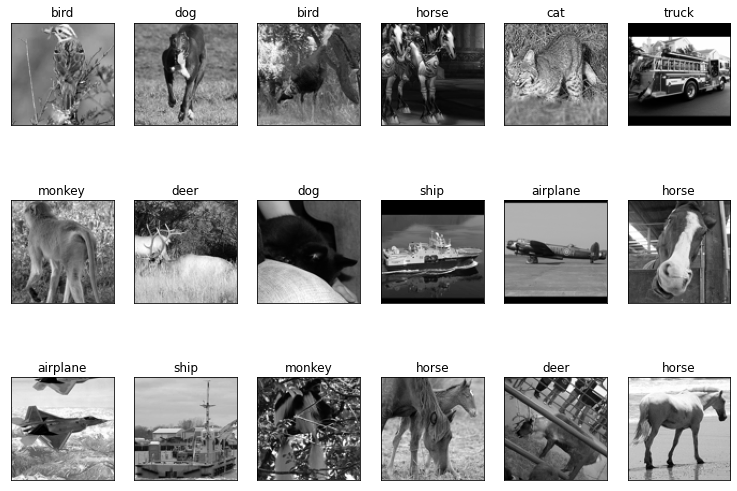

In [2]:
def plot_gallery(images, titles, h, w, flag, n_row=3, n_col=6):
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=1.0, hspace=.25)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
        if flag:
            plt.title(classNames[titles[i] - 1], size=12)
        if not flag:
            plt.title(titles[i], size=12)
        plt.xticks(());  plt.yticks(())

plot_gallery(greyscale_vec, labels, h, w, True)

Here we visualize 18 images within the greyscale numpy array. This function will be helpful later
on to output certain images given a certain certain array.

----------------------------

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.3 Creating Training & Test Data (7%)

In [3]:
# - Choose the method you will use for dividing your data into training & testing

# Split data set (train & fold)

----------------------------

- Explain, Why am I using : a Stratisfied 10-fold cross validation? or Shuffle splits?

- Explain why my chosen method is appropriate or use more than one method as appropriate.

- Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice.


----------------------------

## 2. Modeling

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Training w/ Data Expansion (15%)

In [4]:
# - Setup the training to use data expansion in Keras.

- Explain why the chosen data expansion techniques are appropriate for my dataset.


#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2 Exploring Convolutional Architectures (20%)

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.1 Method 1:

In [5]:
# 1.) CNN - Variation 1 : Investigate a Convolutional Network Architecture --- (& investigate changing some parameters of each arch
# - Create a CNN to use on my data using Keras.

In [6]:
# 2.) CNN - Variation 2 : Investigate a Convolutional Network Architecture --- (& investigate changing some parameters of each arch
# - Create a CNN to use on my data using Keras.

##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.2 Method 2:

In [7]:
# 1.) CNN - Variation 1 : Investigate a Convolutional Network Architecture --- (& investigate changing some parameters of each arch
# - Create a CNN to use on my data using Keras.

In [8]:
# 2.) CNN - Variation 2 : Investigate a Convolutional Network Architecture --- (& investigate changing some parameters of each arch
# - Create a CNN to use on my data using Keras.

- Use the method of cross validation & evaluation metric that you argued for at the beginning of the lab.
- Visualize the performance of the training & validation sets per iteration (use the "history" parameter of Keras).

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3 (15 points)
- Visualize the final results of the CNNs & interpret the performance.
- Use proper statistics as appropriate, especially for comparing models.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.4 (10 points)
- Compare the performance of my convolutional network to a standard multi-layer perceptron (MLP) using the receiver
  operating characteristic & area under the curve.
- Use proper statistical comparison techniques.


### 3. Transfer Learning
Exceptional Work (1 points total)
You have free reign to provide additional analyses.
One idea (required for 7000 level students): Use transfer learning to pre-train the weights of your initial layers of your CNN. Compare the performance when using transfer learning to training from scratch in terms of classification performance.


#### Reference